## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and Standard Error of the Mean(SEM) of the tumor volume for each regimen

Drugs = mouse_study.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)' : ['mean','median','var','std','sem']})
Drugs_Effect = pd.DataFrame(Drugs)
#As agg function creates a multiindex and didn't allow me to work with that 
#I found this droplevel function thata allow me to split a multiindex
Drugs_Effect.columns = Drugs_Effect.columns.droplevel()
Drugs_Effect.columns

Index(['mean', 'median', 'var', 'std', 'sem'], dtype='object')

In [75]:
Drugs_Effect.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

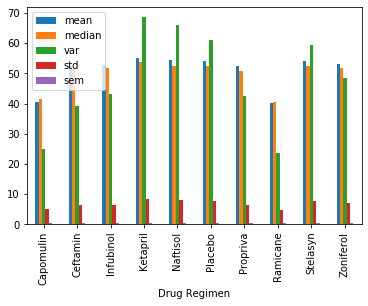

In [35]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
Drugs_Effect.plot(kind='bar')


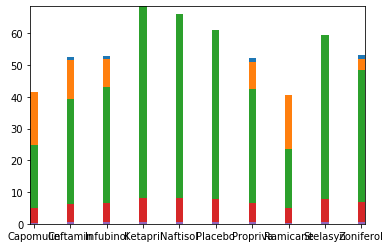

In [92]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x = [x for x in Drugs_Effect.index.values]
ax = plt.subplot()
ax.bar(x,Drugs_Effect['mean'], width=0.2, align='center')
ax.bar(x,Drugs_Effect['median'], width=0.2, align='center')
ax.bar(x,Drugs_Effect['var'], width=0.2, align='center')
ax.bar(x,Drugs_Effect['std'], width=0.2, align='center')
ax.bar(x,Drugs_Effect['sem'], width=0.2, align='center')
ax.autoscale(tight=True)
plt.show()

## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

ax.bar(x+0.4,Drugs_Effect['var'], width=0.2, align='center')
ax.bar(x+0.6,Drugs_Effect['std'], width=0.2, align='center')
ax.bar(x+0.8,Drugs_Effect['sem'], width=0.2, align='center')

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen